# Project-1 | Btech CSE 2023-2027
---
**Team Members :-**

**Suhas Kanwar** - Btech-CSE-3

**Aditya Yadav** - Btech-CSE-3

**Suryansh Mahajan** - Btech-CSE-3

---

## Importing Libraries

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import plotly.express as px
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score,classification_report
# from sklearn.preprocessing import RobustScaler
# from sklearn.metrics import confusion_matrix
# import scipy
# import scipy.stats as stats
# from scipy.stats import chi2_contingency
# from scipy.stats import shapiro
# from statsmodels.stats.weightstats import ttest_ind

## Importing Dataset

In [3]:
df = pd.read_csv('heart_attack_prediction_dataset.csv')

## About Dataset

In [4]:
df.head(5)

Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67    Male          208         158/88          72         0   
1    CZE1114   21    Male          389         165/93          98         1   
2    BNI9906   21  Female          324         174/99          72         1   
3    JLN3497   84    Male          383        163/100          73         1   
4    GFO8847   66    Male          318          91/88          93         1   

   Family History  Smoking  Obesity  ...  Sedentary Hours Per Day  Income  \
0               0        1        0  ...                 6.615001  261404   
1               1        1        1  ...                 4.963459  285768   
2               0        0        0  ...                 9.463426  235282   
3               1        1        0  ...                 7.648981  125640   
4               1        1        1  ...                 1.514821  160555   

         BMI  Triglycerides  Physical Activity Days Per Week  \
0  31.251233            286                                0   
1  27.194973            235                                1   
2  28.176571            587                                4   
3  36.464704            378                                3   
4  21.809144            231                                1   

   Sleep Hours Per Day    Country      Continent           Hemisphere  \
0                    6  Argentina  South America  Southern Hemisphere   
1                    7     Canada  North America  Northern Hemisphere   
2                    4     France         Europe  Northern Hemisphere   
3                    4     Canada  North America  Northern Hemisphere   
4                    5   Thailand           Asia  Northern Hemisphere   

   Heart Attack Risk  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  

[5 rows x 26 columns]

In [5]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [6]:
print("The dimensions of the Data Frame (shape):",df.shape)
print("Total no. of elements in the Data Frame (size):",df.size)

The dimensions of the Data Frame (shape): (8763, 26)
Total no. of elements in the Data Frame (size): 227838


In [7]:
print("Columns:")
for i in df.columns:
    print(i)

Columns:
Patient ID
Age
Sex
Cholesterol
Blood Pressure
Heart Rate
Diabetes
Family History
Smoking
Obesity
Alcohol Consumption
Exercise Hours Per Week
Diet
Previous Heart Problems
Medication Use
Stress Level
Sedentary Hours Per Day
Income
BMI
Triglycerides
Physical Activity Days Per Week
Sleep Hours Per Day
Country
Continent
Hemisphere
Heart Attack Risk


### Checking duplicate values

In [8]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 26)


We can see that there are no duplicate values in the dataset

### Checking null values

In [9]:
print(df.isnull().sum())

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64


In [10]:
df.corr(numeric_only=True)

Age  Cholesterol  Heart Rate  Diabetes  \
Age                              1.000000    -0.009107   -0.003844 -0.014105   
Cholesterol                     -0.009107     1.000000    0.000315 -0.013428   
Heart Rate                      -0.003844     0.000315    1.000000  0.006764   
Diabetes                        -0.014105    -0.013428    0.006764  1.000000   
Family History                   0.008353    -0.021608   -0.013470 -0.013844   
Smoking                          0.394891     0.016342   -0.012331  0.000527   
Obesity                         -0.008140    -0.014843    0.012725  0.012866   
Alcohol Consumption             -0.006666    -0.007261    0.003459  0.005551   
Exercise Hours Per Week          0.001206     0.021517    0.008276 -0.007014   
Previous Heart Problems          0.000868    -0.006070   -0.004956  0.000867   
Medication Use                   0.000980    -0.000905    0.009244 -0.002656   
Stress Level                     0.018307    -0.024487   -0.004547  0.006719   
Sedentary Hours Per Day          0.017280     0.018914   -0.010232  0.004705   
Income                          -0.001733     0.000007    0.004873 -0.000759   
BMI                             -0.002612     0.017292    0.005299 -0.002852   
Triglycerides                    0.003415    -0.005454    0.012244  0.010431   
Physical Activity Days Per Week  0.001384     0.016056    0.000834 -0.002411   
Sleep Hours Per Day             -0.002185     0.004456    0.001811 -0.012457   
Heart Attack Risk                0.006403     0.019340   -0.004251  0.017225   

                                 Family History   Smoking   Obesity  \
Age                                    0.008353  0.394891 -0.008140   
Cholesterol                           -0.021608  0.016342 -0.014843   
Heart Rate                            -0.013470 -0.012331  0.012725   
Diabetes                              -0.013844  0.000527  0.012866   
Family History                         1.000000  0.011748 -0.001444   
Smoking                                0.011748  1.000000  0.003969   
Obesity                               -0.001444  0.003969  1.000000   
Alcohol Consumption                    0.012701  0.012754 -0.024195   
Exercise Hours Per Week               -0.006378 -0.000150  0.002099   
Previous Heart Problems               -0.004568 -0.000574  0.005159   
Medication Use                         0.000981 -0.010877 -0.006267   
Stress Level                           0.015637 -0.001757  0.010626   
Sedentary Hours Per Day                0.002561  0.015311 -0.001333   
Income                                -0.000401  0.003096 -0.003870   
BMI                                   -0.011492  0.007670 -0.006058   
Triglycerides                         -0.001904  0.004650  0.001467   
Physical Activity Days Per Week        0.009561 -0.006465  0.005337   
Sleep Hours Per Day                   -0.011199 -0.005424 -0.005314   
Heart Attack Risk                     -0.001652 -0.004051 -0.013318   

                                 Alcohol Consumption  Exercise Hours Per Week  \
Age                                        -0.006666                 0.001206   
Cholesterol                                -0.007261                 0.021517   
Heart Rate                                  0.003459                 0.008276   
Diabetes                                    0.005551                -0.007014   
Family History                              0.012701                -0.006378   
Smoking                                     0.012754                -0.000150   
Obesity                                    -0.024195                 0.002099   
Alcohol Consumption                         1.000000                -0.008514   
Exercise Hours Per Week                    -0.008514                 1.000000   
Previous Heart Problems                     0.010395                 0.005253   
Medication Use                              0.003339                -0.007119   
Stress Level                               -

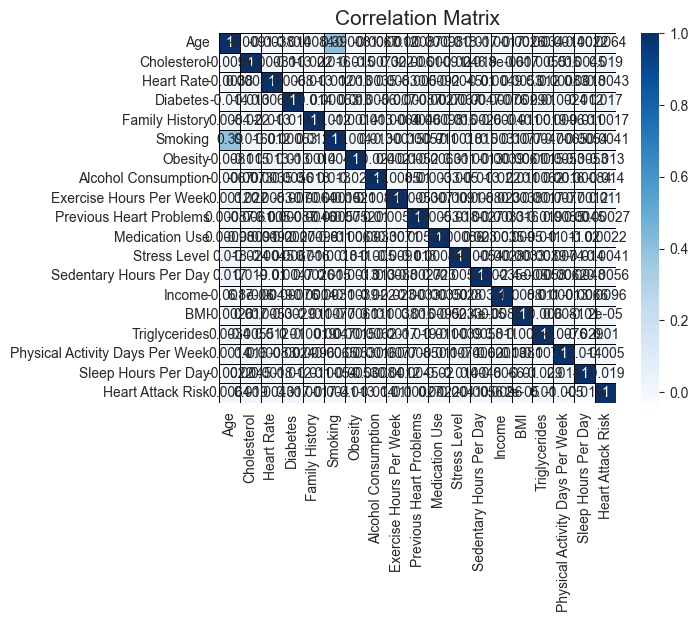

In [11]:
sns.set_style("darkgrid")
plt.title('Correlation Matrix',fontsize=15)
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Blues',linewidth=0.5,linecolor='k')
plt.show()

<Figure size 1200x1200 with 0 Axes>

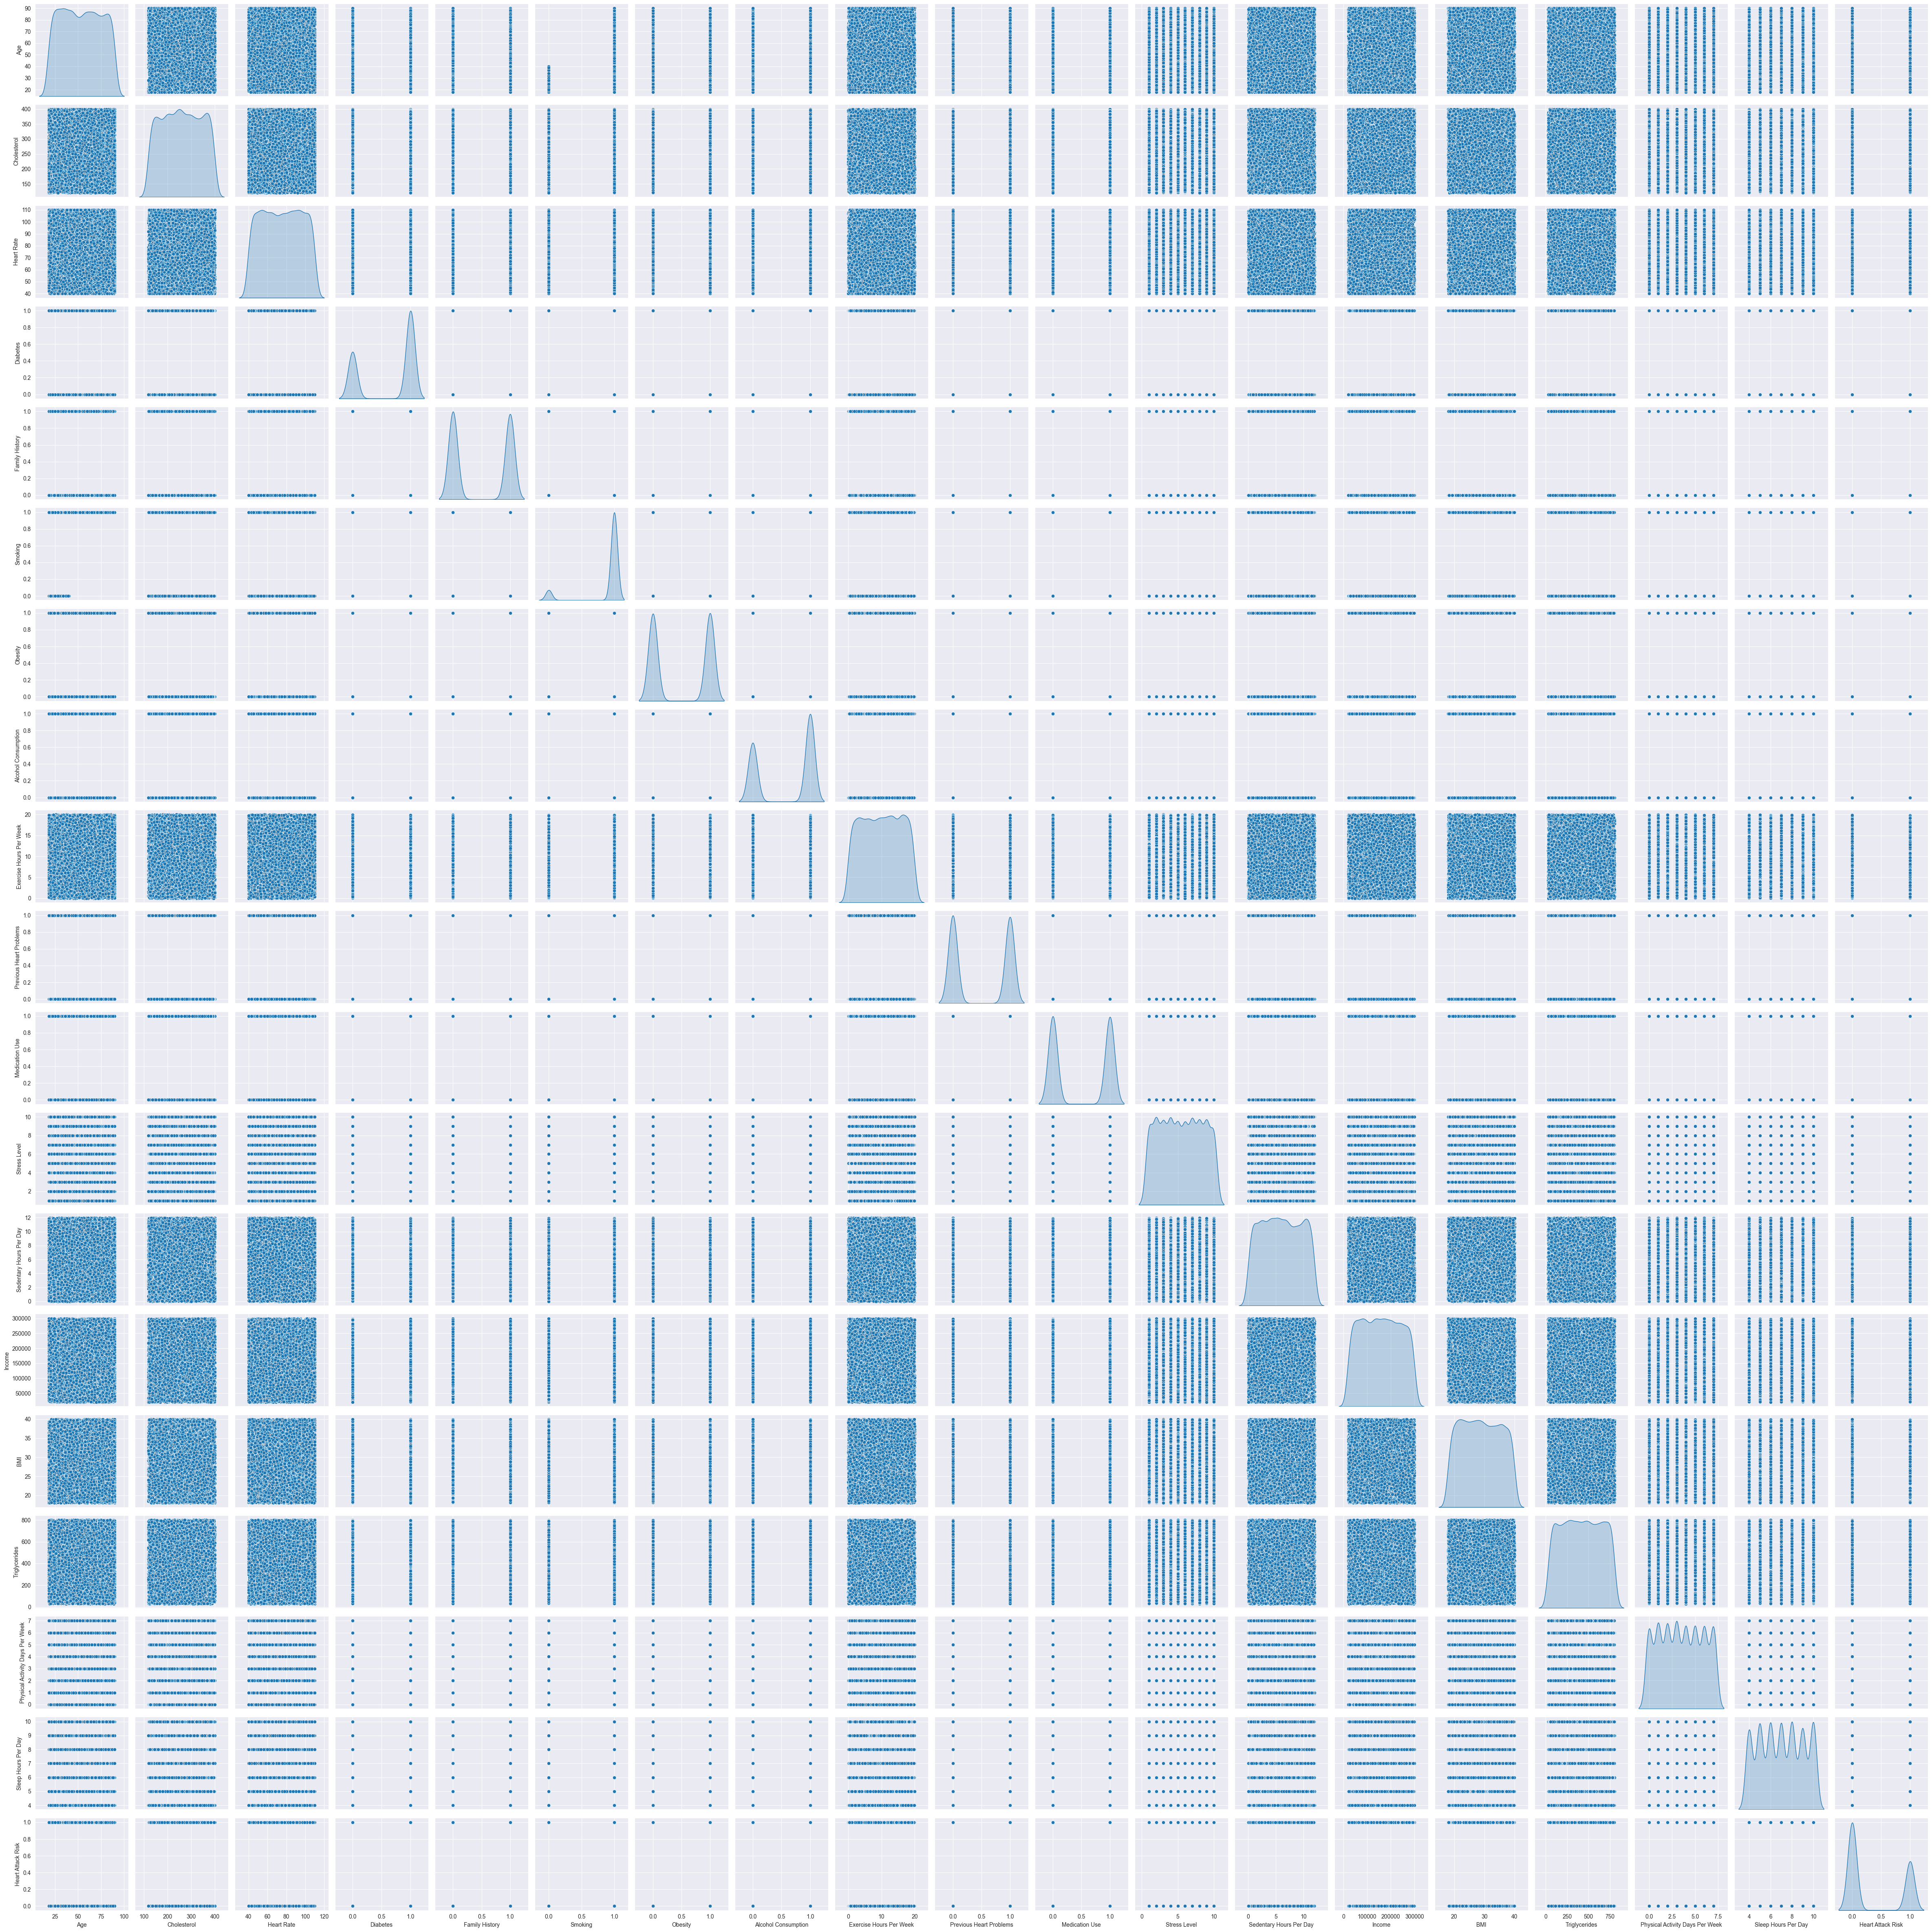

In [12]:
plt.figure(figsize=(6,6),dpi=200)
sns.pairplot(df,diag_kind='kde')
plt.tight_layout()
plt.show()

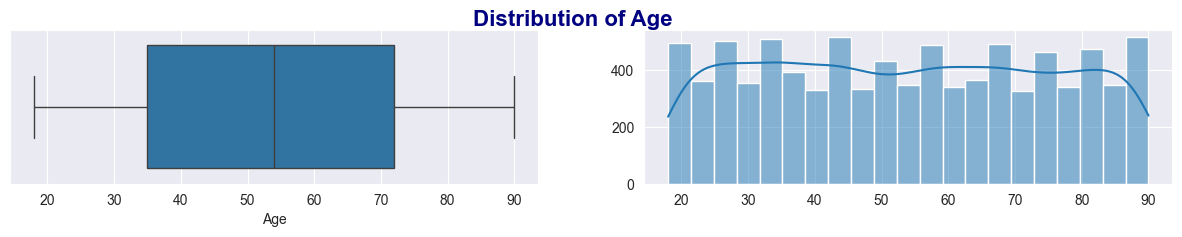

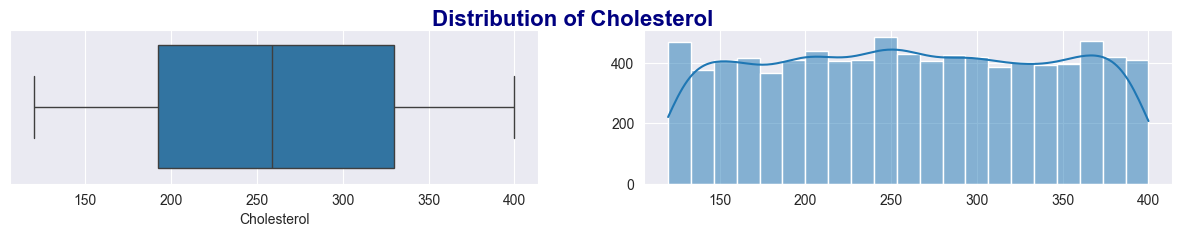

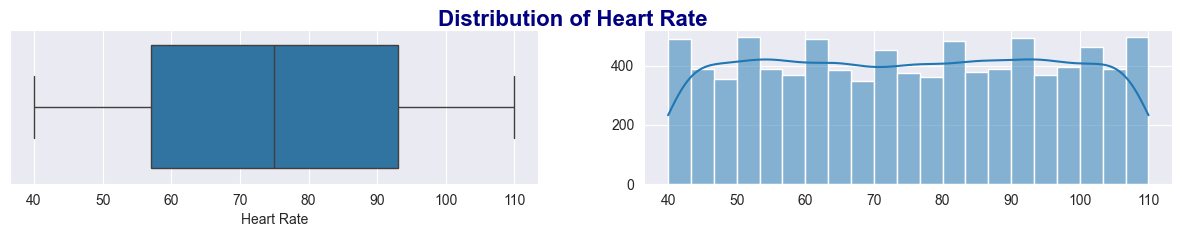

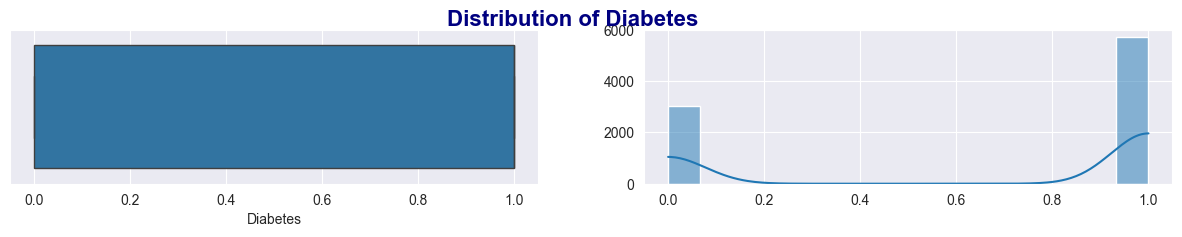

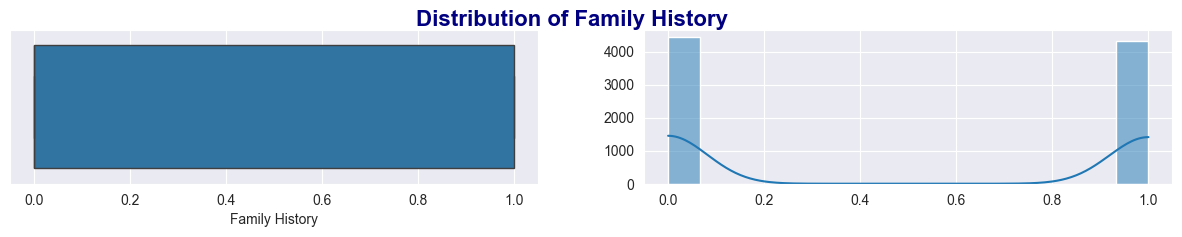

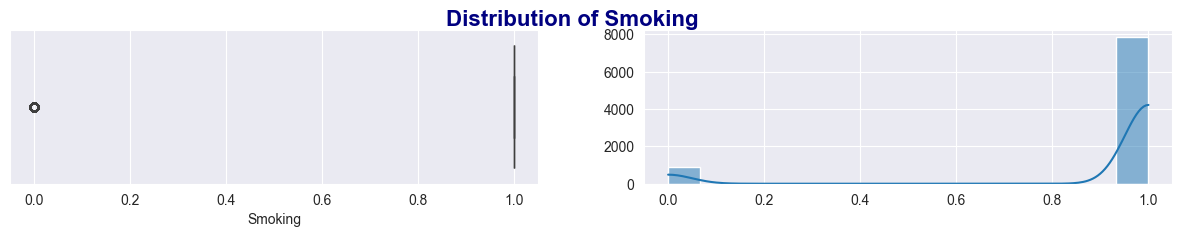

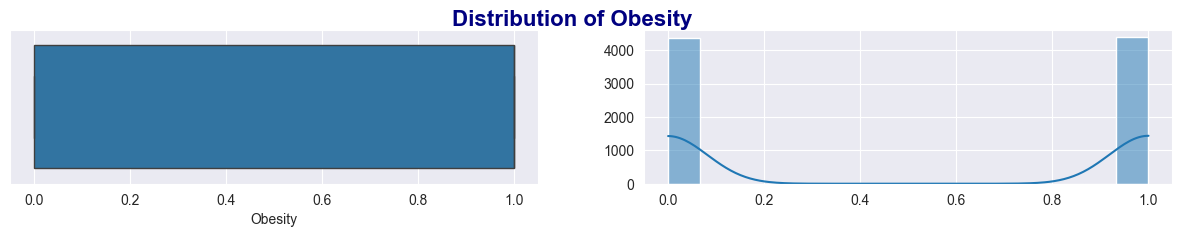

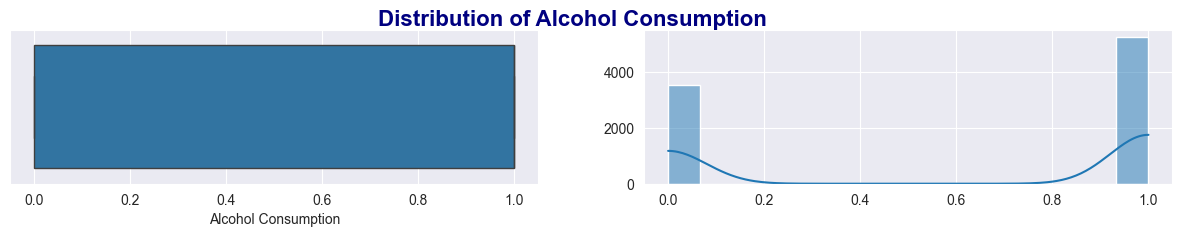

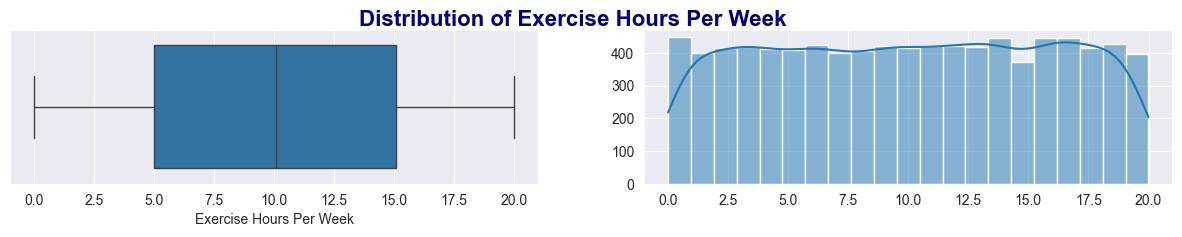

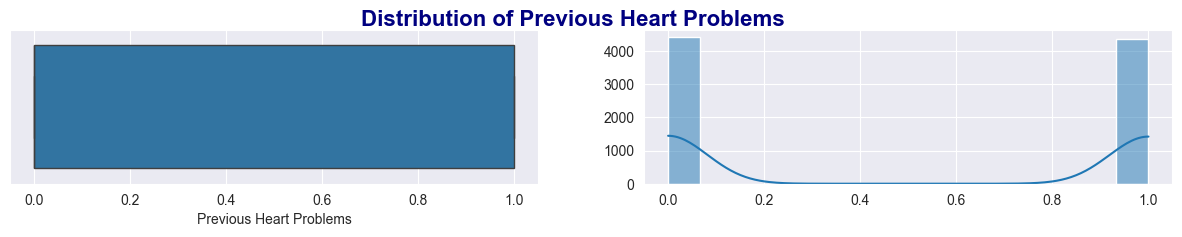

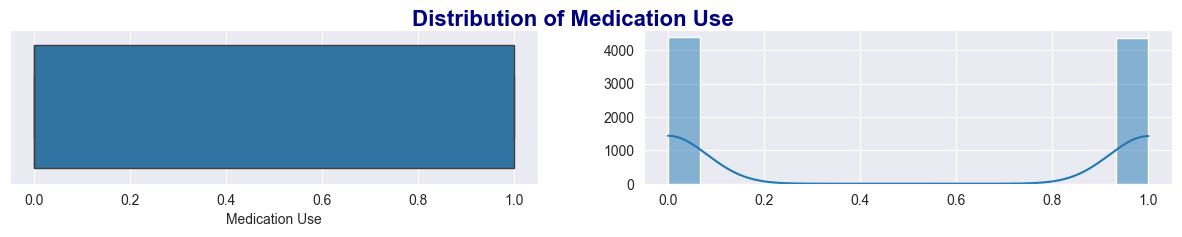

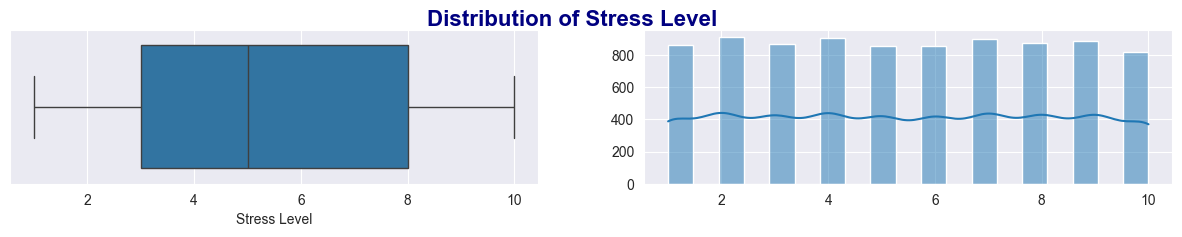

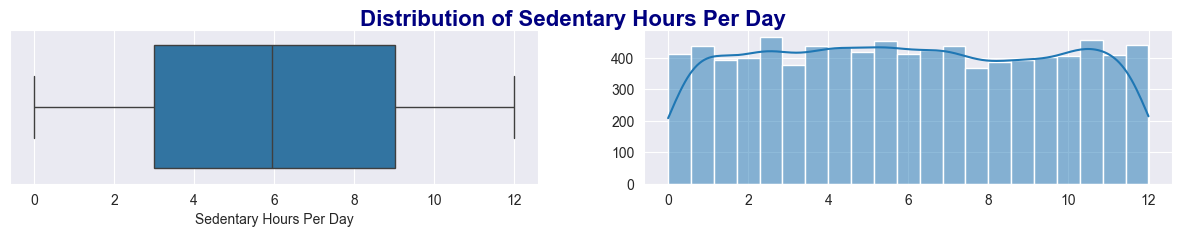

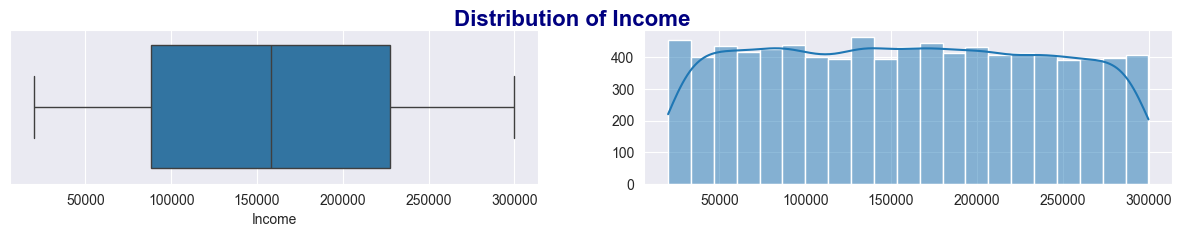

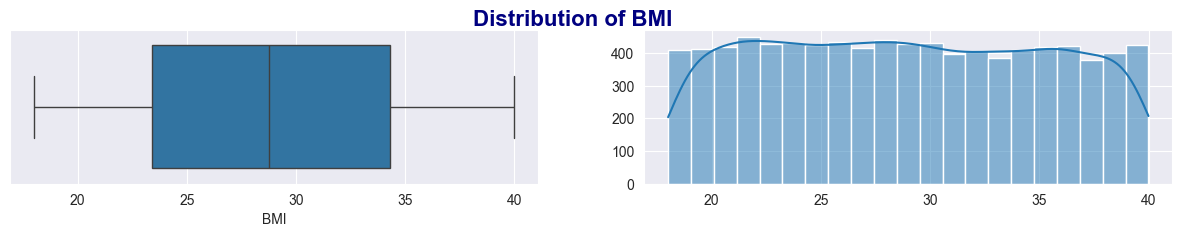

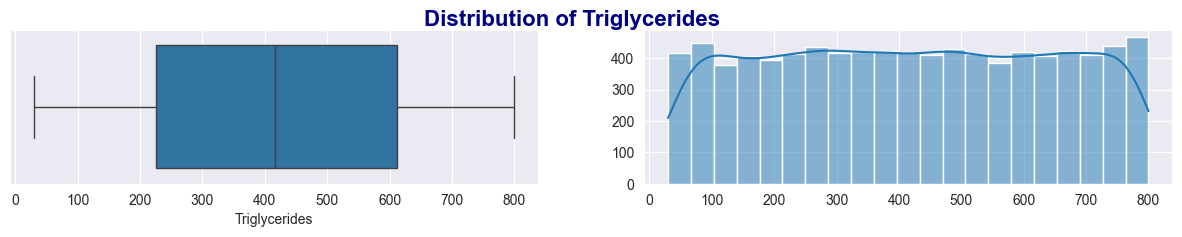

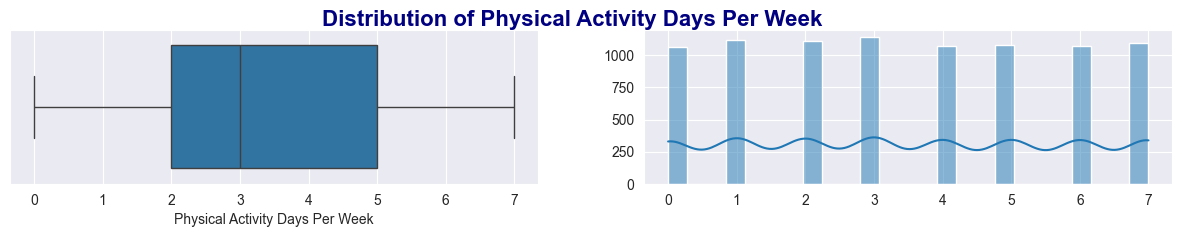

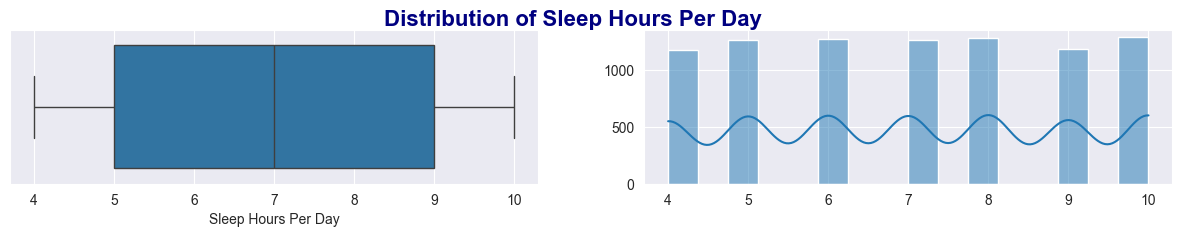

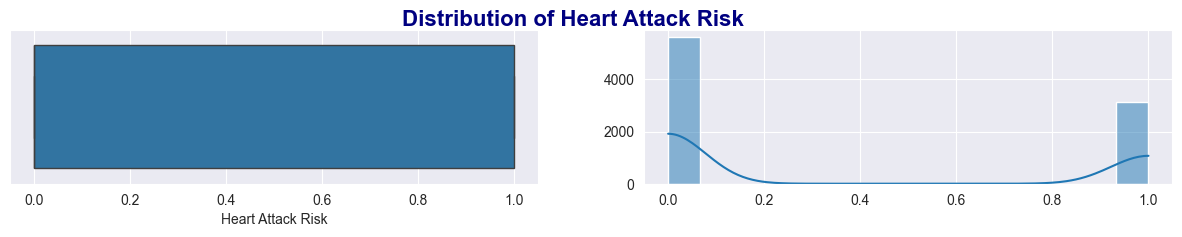

In [16]:
df_num = df.select_dtypes(exclude = 'object')
columns = df_num.columns
sns.set_style("darkgrid")
for i in range(0, 19):
    fig, ax = plt.subplots(1, 2, figsize=(15, 2))
    plt.suptitle(f"Distribution of {columns[i]}", fontsize=16, fontweight='bold', color='navy')
    sns.boxplot(x=columns[i], data=df_num, ax=ax[0])
    sns.histplot(df_num[columns[i]],kde = True, ax=ax[1])
    plt.xlabel("")
    plt.ylabel("")
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

## Visualization of data